In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
# Importing essential libraries for data analysis and visualization
import numpy as np  # NumPy: library for numerical operations, especially with arrays and matrices
import pandas as pd  # Pandas: library for data manipulation and analysis, mainly using DataFrames
import matplotlib.pyplot as plt  # Matplotlib: widely-used library for data visualization in Python
import seaborn as sns  # Seaborn: statistical data visualization library built on top of Matplotlib

# Importing Plotly libraries for interactive visualizations
import plotly.express as px  # Plotly Express: a high-level interface for creating quick, simple, interactive plots
import plotly.graph_objects as go  # Plotly Graph Objects: low-level interface for more complex and customized visualizations
from plotly.subplots import make_subplots  # Function for creating subplot layouts with Plotly

# Suppressing warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')  # Ignores all warnings that might be displayed during code execution


In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

In [4]:
# Check for missing values in each column of the 'train' DataFrame
train.isna().sum()  # Returns the count of missing values for each column


id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
# Check for missing values in each column of the 'test' DataFrame
test.isna().sum()  # Returns the count of missing values for each column


id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

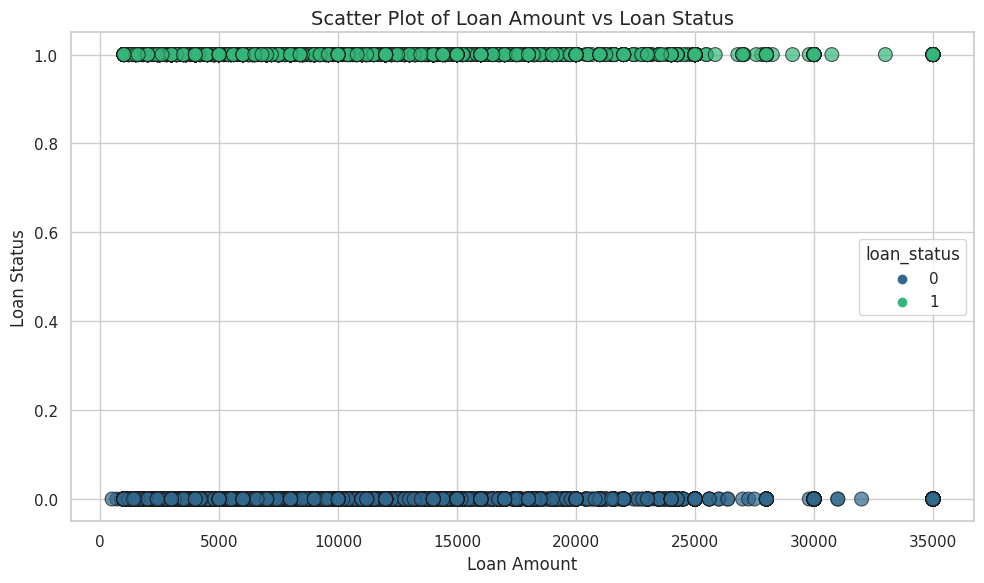

In [6]:


# Setting a Seaborn theme for better aesthetics
sns.set_theme(style='whitegrid')

# Creating a scatter plot with improved aesthetics
plt.figure(figsize=(10, 6))  # Setting the figure size for better visualization
sns.scatterplot(x='loan_amnt', y='loan_status', hue='loan_status', data=train, 
                palette='viridis', s=100, alpha=0.7, edgecolor='k')

# Adding titles and labels
plt.title('Scatter Plot of Loan Amount vs Loan Status', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Loan Status', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust the plot to make sure everything fits well
plt.show()


In [7]:
target = train['loan_status']

In [8]:
# Dropping the 'id' and 'loan_status' columns from the 'train' DataFrame, modifying it in place
train.drop(columns=['id', 'loan_status'], inplace=True)  

# Selecting only the numerical columns (of types int64 and float64) from the modified 'train' DataFrame
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Converting the numerical columns into a list
numerical_columns = list(numerical_columns)

# Displaying the list of numerical column names
numerical_columns


['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [9]:
# Dropping the 'id' column from the 'test' DataFrame, modifying it in place
test.drop(columns=['id'], inplace=True)  

# Selecting only the numerical columns (of types int64 and float64) from the modified 'test' DataFrame
test_numerical_columns = test.select_dtypes(include=['int64', 'float64']).columns

# Converting the numerical columns into a list
test_numerical_columns = list(test_numerical_columns)

# Displaying the list of numerical column names from the 'test' DataFrame
test_numerical_columns


['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [10]:
# Selecting only the categorical columns (of type 'object') from the 'train' DataFrame
categorical_columns = train.select_dtypes(include=['object']).columns

# Converting the categorical columns into a list
categorical_columns = list(categorical_columns)

# Displaying the list of categorical column names
categorical_columns


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [11]:
# Selecting only the categorical columns (of type 'object') from the 'test' DataFrame
test_categorical_columns = test.select_dtypes(include=['object']).columns

# Converting the categorical columns into a list
test_categorical_columns = list(test_categorical_columns)

# Displaying the list of categorical column names from the 'test' DataFrame
test_categorical_columns


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

**ENCODING**


In [12]:
# Importing LabelEncoder from scikit-learn for encoding categorical labels into numerical format
from sklearn.preprocessing import LabelEncoder  

# Importing MinMaxScaler from scikit-learn for scaling features to a range (0 to 1)
from sklearn.preprocessing import MinMaxScaler  

# Importing OneHotEncoder from scikit-learn for converting categorical variables into a one-hot encoded format
from sklearn.preprocessing import OneHotEncoder  


In [13]:
# Initializing and fitting the MinMaxScaler to the numerical columns of the 'train' DataFrame
scaler = MinMaxScaler().fit(train[numerical_columns])  

# Applying the fitted MinMaxScaler to transform the numerical columns in the 'train' DataFrame
train[numerical_columns] = scaler.transform(train[numerical_columns])  

# Applying the same transformation to the numerical columns in the 'test' DataFrame
test[numerical_columns] = scaler.transform(test[numerical_columns])  

# Initializing and fitting the OneHotEncoder to the categorical columns of the 'train' DataFrame
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train[categorical_columns])  

# Transforming the categorical columns in the 'train' DataFrame using the fitted OneHotEncoder
encoded_cols = encoder.transform(train[categorical_columns])  

# Getting the feature names resulting from the one-hot encoding and converting them into a list
encoded_cols = list(encoder.get_feature_names_out(categorical_columns))  

# Assigning the one-hot encoded columns back to the 'train' DataFrame
train[encoded_cols] = encoder.transform(train[categorical_columns])  

# Assigning the same one-hot encoded columns to the 'test' DataFrame
test[encoded_cols] = encoder.transform(test[categorical_columns])  

# Creating the feature set 'X' for training by combining numerical columns and one-hot encoded columns from the 'train' DataFrame
X = train[numerical_columns + encoded_cols]  

# Creating the feature set 'X_test' for testing by combining numerical columns and one-hot encoded columns from the 'test' DataFrame
X_test = test[numerical_columns + encoded_cols]  

X_test


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.029126,0.034181,0.024390,0.710145,0.580899,0.433735,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.058252,0.048423,0.048780,0.275362,0.407865,0.120482,0.071429,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.058252,0.013609,0.040650,0.101449,0.661236,0.156627,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.126214,0.024159,0.032520,0.188406,0.195506,0.168675,0.178571,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.058252,0.051588,0.065041,0.420290,0.612360,0.180723,0.071429,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,0.019417,0.014242,0.016260,0.072464,0.278090,0.120482,0.071429,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39094,0.019417,0.023104,0.048780,0.188406,0.034270,0.180723,0.035714,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39095,0.300971,0.029433,0.000000,0.420290,0.117416,0.301205,0.821429,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39096,0.019417,0.016774,0.032520,0.391304,0.573034,0.469880,0.071429,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**GRADIANT_BOOSTING**

In [14]:
# Importing the GradientBoostingClassifier from scikit-learn
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the Gradient Boosting Classifier model with specified hyperparameters
model1 = GradientBoostingClassifier(
    n_estimators=500,        # Number of boosting stages to be run (trees)
    learning_rate=0.5,       # Step size for each iteration, controlling the contribution of each tree
    max_depth=10,            # Maximum depth of the individual regression estimators (trees)
    random_state=42)         # Seed for reproducibility

# Fitting the model to the training data (X) and target labels
model1.fit(X, target)  


GradientBoostingClassifier(learning_rate=0.5, max_depth=10, n_estimators=500,
                           random_state=42)

In [15]:
pred = model1.predict(X)

In [16]:
# Importing the accuracy_score function from scikit-learn metrics
from sklearn.metrics import accuracy_score

# Calculating the accuracy of the model's predictions
accuracy = accuracy_score(target, pred)  

# Displaying the accuracy score
accuracy


1.0

In [17]:
test_preds = model1.predict_proba(X_test)[:, 1]
test_preds

array([1.00000000e+00, 4.27759666e-10, 9.99999490e-01, ...,
       1.83045767e-13, 7.32819311e-03, 9.99999996e-01])

In [18]:
id = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

In [19]:
gbm_df = pd.DataFrame({'id': id['id'], 'loan_status':test_preds })

# Display the first few rows of the dataframe
gbm_df.head()

,id,loan_status
0,58645,1.000000e+00
1,58646,4.277597e-10
2,58647,9.999995e-01
3,58648,1.257658e-09
4,58649,1.777696e-07


In [20]:
gbm_df.to_csv('first_sub.csv', index=False)